## 0.1 추천시스템
1. 내용 기반 필터링
    - 콘텐츠 유사도 기반
    - 한 명의 사용자
2. 협업 필터링
    - 서비스 내 다수의 사용자에서 얻은 선호도 정보 기반
    - 다수의 사용자
3. 하이브리드 필터링
    - 추천시스템 알고리즘 조합

## 0.2 협업 필터링(CF) 구현 방식
1. 기억 기반 CF
    - 사용자 기반 협업 필터링: 취향이 비슷한 다른 사용자
    - 아이템 기반 협업 필터링: 함께 선호되는 아이템
2. 기억 기반 CF의 한계
    - 데이터 희소성 문제: 사용자가 평점을 잘 안 매김
    - 확장성 문제: O(N^2)
    - 새로운 아이템 문제: 새로 나와서 추천 기회 X
3. 모델 기반 CF 등장
    - 평점 데이터에서 잠재 요인을 학습하고 평점을 예측하자!
    - 내적을 사용하므로 확장성 문제 해결

## 1.1 잠재 요인과 행렬 분해
### 1.1.1 잠재 요인(Latent Factor, LF)
- 잠재 요인: 특성을 설명하는 Hidden Dimension!
- 사람이 명시적으로 이해하기 어렵다: 모델이 스스로 학습한 추상적 개념
- 학습된 벡터로 유저가 특정 아이템의 어떤 특성에 이끌리는지를 간접 파악 가능
- 평점 행렬 R을 유저 잠재 요인 행렬 $P$와 아이템 잠재 요인 행렬 $Q^T$로 분해
- 학습 후에 결과에 가장 유사한 의미를 부여함: 사후 해석
- 모델 자체가 의미를 알지는 못함.

### 1.1.2 행렬 분해(Matrix Factorization, MF)
- MF의 가설: P와 QT의 내적으로 R을 설명할 수 있다.
- 목표: 평점을 가장 잘 재현하는 잠재요인 개수 k를 찾고 유사해지도록 P와 QT를 학습하기
- 학습한 벡터로 내적하면 R을 예상할 수 있다.

### 1.1.3 MF 수행 방식
> SVD, SGD, NMF, PMF

### (1) SVD(Singular Vector Decomposition): 특잇값 분해

- 수학적 분해 기법, 결측치 처리 필요

$$
A=UΣV^T
$$
- $A$: 원래의 m×n 행렬(사용자-아이템 평점 행렬)
- $U$:  $m×m$ 직교 행렬(사용자 정보)
- $Σ$: $m×n$ 대각 행렬(특잇값)
- $V^T$ : $n×n$ 직교 행렬(아이템 정보)

- Σ
    - 대각선이 A의 Singular values가 내림차순으로 이뤄짐. 나머지는 다 0이다.
    - 특잇값은 얼마나 많은 정보를 설명하는지 나타낸다. 클수록 좋다.
    - 특잇값은 정보의 우선순위다. 상위 k개만 사용하면 핵심을 효율적으로 압축할 수 있다.
- Full SVD: 계산량이 많다.
- Truncated SVD: k개만 선택하여 노이즈 영향을 덜 받는다.

- SVD를 이용한 MF 구현
    1. 결측치 처리: 평균 등으로 채워 A 완성
    2. SVD: $U, \Sigma, V^T$ 계산
    3. 차원 축소: truncation, $U_k$와 $V^T_k$ 추출
    4. 잠재 요인 추출: 위에서 추출한 거를 내적해서 예측 평점 계산

`+` 수학적으로 좋다. <br>
`-` 실제 희소 평점 행렬에 사용하기 어려움<br>
`-` 계산량이 많음

### (2) SGD(Stochastic Gradient Descent)
- 목표: 실제 평점과 예측 평점의 오차를 최소화하자!
- Objective Function: 오차 제곱 최소화 + 정규화

- SGD를 이용한 MF 구현
    1. 초기화: $P$, $Q^T$를 작은 랜덤값으로 초기화
    2. 반복
    3. 오차 계산
    4. 잠재 벡터 업데이트: 경사하강법으로 오차 줄임

### (3) Non-Negatice Matrix Factorization(NMF)
- 제약 조건 추가: $P$와 $Q^T$의 모든 원소가 0 이상이어야 한다.
    - 현실 데이터가 음수일 수 없다는 점 
- 잠재 요인이 선호도/특성을 나타낸다고 직관적으로 해석 O
- NMF를 이용한 MF 구현
    1. 초기화: $P$, $Q^T$를 non negative로 초기화
    2. 최적화: multiplicative update rule 이용
    3. 결과 도출

`+` 직관적인 의미 부여 가능 

### (4) Probabilistic Factorization(PMF)
- 누가 무엇을 좋아할지
- 확률적 모델: 불확실성 포함
- 베이지안 추론 기법과 결합하여 정교히 할 수 있음

## 2. 최근 추천시스템의 방향성
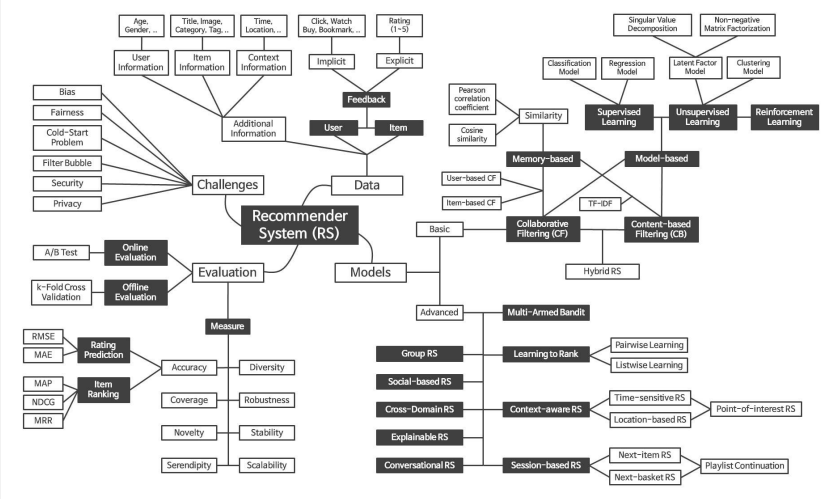

## 2.1. VAE 기반 협업 필터링(Variational Autoencoder CF)
- 아이템 상호작용 벡터를 입력받아 잠재 공간에서 재구성하도록 VAE 학습하기
- 인코더: 사용자 이력을 잠재변수 z 분포로 매핑
- 디코더: z에서 아이템 분포 복원

`+` 불확실성 반영 가능<br>
`+` 희소 데이터에서도 작동 잘 함


### 2.1.1 MF의 한계와 딥러닝의 등장
- MF 한계
    - 선형성의 한계
    - 불확실성 무시

### 2.1.2 AE 말고 VAE?
- VAE가 불확실성을 모델링하기 때문에 희소성을 해결할 수 있다.
- 불확실성을 반영해서 안정성을 높임(확률 분포)

### 2.1.3 VAE 기반 CF 구조
- x: 상호작용 벡터
- encoder: 사용자 데이터를 z로 매핑
- latant vector: 샘플링된 최종 취향 벡터
- decoder: z에서 아이템 분포 복원

### 2.1.4 VAE의: 목적 함수, KL Divergence
$\mathcal{L}(x; \theta, \phi) = \underbrace{E_{q_\phi(z|x)} [ \log p_\theta(x|z) ]}_{\text{재구성 오차 최소화 (Reconstruction Loss)}} - \underbrace{D_{\text{KL}}(q_\phi(z|x) || p(z))}_{\text{잠재 공간 정규화 (KL Divergence)}}$
1. 재구성 오차 최소화 항: z를 사용해 x를 최대한 비슷하게 복원
2. KL 항: 인코더의 출력 $q(z|x)$가 $p(z)$와 유사하도록
    - 잠재 공간 불규칙성 방지. 잠재 공간을 스무스하게 유지

- AE는 불규칙 공간에 있으면 예측하기 어려운데, VAE는 KL로 잠재 공간을 정규 분포 근처로 압축해서 예측하기 수월하게 만든다.
- 특정 유저의 데이터가 부족하더라도, 다른 풍부한 유저의 정보를 보간하여 안정적으로 예측할 수 있게 만든다.
<br>
- VAE-CF 장점
    - 불확실성 반영
    - 희소 데이터에서도 잘 대응할 수 있음
    - 비선형성을 학습할 수 있음.

## 2.2. GNN 기반 사용자 선호 예측
### 2.2.0 GNN 필요성
- VAE는 관계를 활용하지 못함

### 2.2.1 GNN(Graphic Neural Network)
- 사용자-아이템 상호작용은 본질적으로 그래프이다.
- 그래프는 추상적인 개념을 다루기 적합하다. 
    - 컴퓨터가 이해할 수 있는 명시적 데이터로 구조화
- 비유클리드 공간 표현, 학습 가능
- 나와 비슷한 사용자 == 내 이웃의 이웃

### 2.2.2 GNN의 구조
1. 그래프 구조 생성
    - 노드, 엣지를 정의 후, 피처를 담아 표현
2. 메시지 패싱: 메시지 생성, 집계, 갱신
    - 노드 간 정보 전달, 상호작용
            - 정보를 갱신할 타겟 노드 v를 정한다. 
        - 이웃에 전달할 메시지를 생성하자
        - v 이웃들의 임베딩을 평균으로 요약하자.
        - v의 원래 임베딩과 3의 결과를 합쳐서 갱신하자.
    - 모든 노드가 이 과정을 거침
3. 최종 출력

- 내 이웃에서 본 정보를 나한테 전달/요약하자.

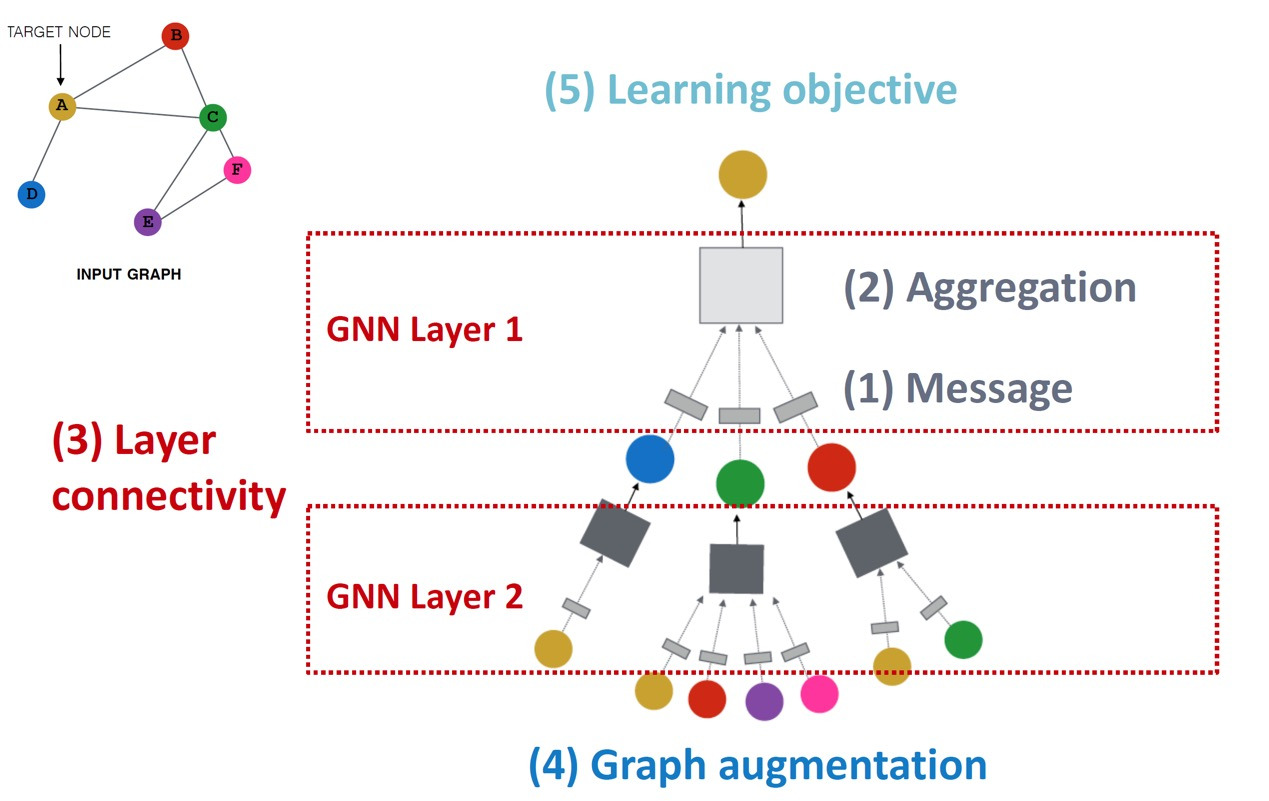

1. 그래프 입력 후 메시지 패싱: 잠재 요인을 수집해 자기의 은닉 상태를 업데이트함.
2. k번 반복하여 먼 거리의 이웃까지 학습

### 2.2.3 LightGCN(Light Graph Convolutional Networks)
1. GCN(Graph Convolutional Network)
    - 그래프에서 Convolution 수행
    - 이웃, 타겟 노드에 동일한 파라미터 적용
    - LightGCN

2. GRN(Graph Recurrent Network)
    - RNN + GNN
    - 시간에 따라 노드 업데이트. 그래프 변화 포착 가능

3. GAT(Graph Attention Network)
    - 이웃 간 중요도 학습하여 가중 평균
    - 타겟의 이웃 중 중요 노드에 가중치
    
4. GraphSAGE
    - 대규모 그래프 샘플링 기반 학습
    - 이웃, 타겟의 가중치를 concat함

#### LightGCN
- 추천시스템에 특화된 GNN
- 복잡성 제거, 최적화

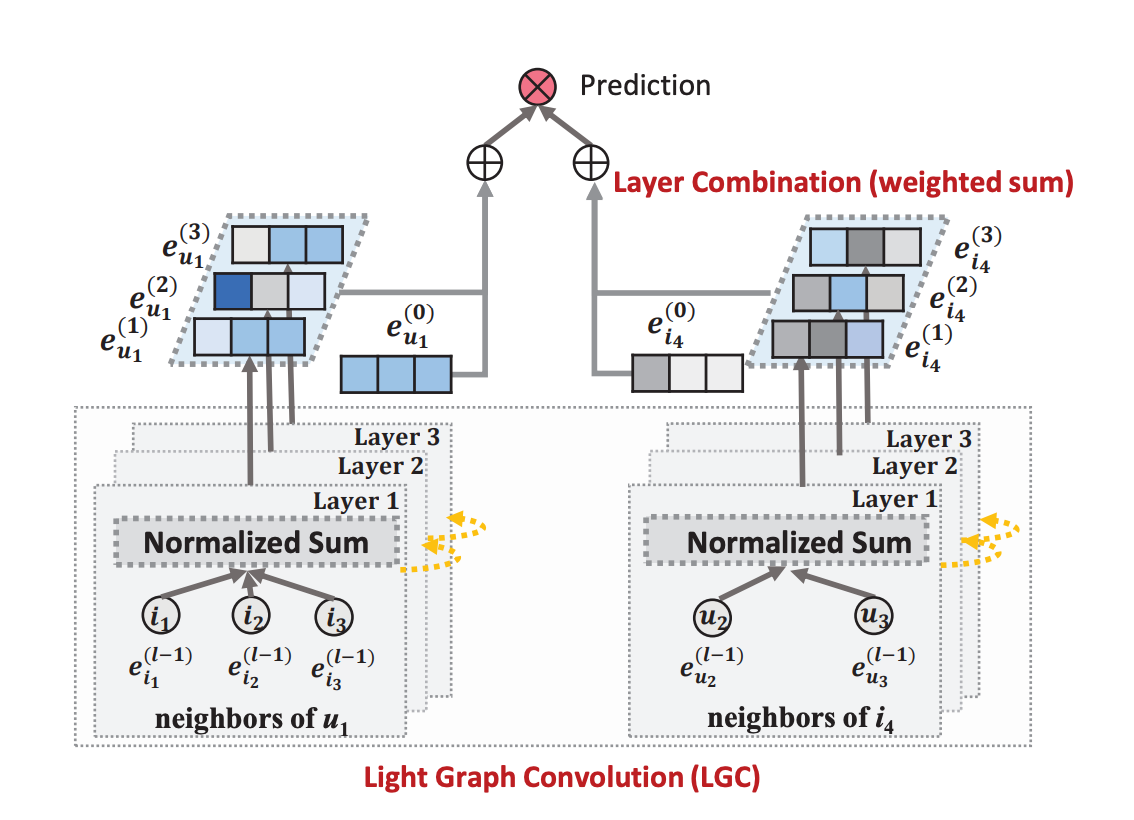

- 복잡한 연산이 관계 왜곡, 학습 방해
    - GNN에서 몇 개를 제거하자!
    1. Feature transformation 제거: $W^{(l)}$
    2. Non-linear activation 제거: 정규화 합, 평균 사용!
> Normalized 이웃 임베딩의 Aggregation만으로 구성된다!!

> CF의 본질에 충실하게 그래프 구조와 전파라는 뼈대만 남긴 효율이 좋은 모델

### 2.2.4 GNN 활용 사례
- pinterest
- 소셜 네트워크
- 추천 시스템
- 화학, 생명과학
- 금융 보안
- 교통

### 2.2.5 GNN의 장점
1. 고차원 협업 시그널 포착
2. 정형화되지 않은 데이터 학습도 가능: 관계 학습
3. Cold Start 문제 완화 가능: 주변 이웃 관계를 통해 즉각적 임베딩

### 2.2.6 GNN의 단점
1. Over smoothing: 임베딩이 같은 값으로 수렴하는 현상
2. Oversquashing
3. 계산 복잡도
4. 해석 어려움

## 2.3. Transformer 기반 추천 시스템
순서와 문맥으로 이해

### 2.3.1-1 CF의 한계
- 순서 무시
- 문맥 부족: 방금과 1년 전 구분 X
- 예측 한계: 다음 행동보다는 일반적 선호도

### 2.3.1-2 GNN의 순차적 한계
- 지역 정보 전파 한계
- 장기 의존성 문제

### 2.3.2. Transformer: 사용자 행동을 Sequence대로 접근
- 문맥과 핵심 의도 파악에 강력하다.
- self attention을 통해 어떤 문맥에서 등장했는지 파악할 수 있음.
- 멀리 떨어진 과거 행동이 다음 행동을 결정할 수 있는데, 이것도 파악 가능.

### 2.3.3. Transformer: Self-Attention
- 시퀀스 내 모든 아이템 관계를 거리 상관없이 동시 계산
- 현재 아이템(Query)이 다른 아이템(Key)을 참조
- 관련성이 높은 아이템의 정보(Value)를 가져옴.
- 아이템 관련성에 따라 V가 차등 적용됨.

### 2.3.4. Transformer 추천 시스템 모델
1. SASRec(Self-Attentive Sequential Recommendation)
    - 단방향 어텐션
    - 과거 아이템 정보만 참조 가능 > 다음 아이템 예측
    - 다음 행동 예측에 초점!
    - `-` 계산량 많음, 단방향성
    - 위를 극복한 게 BERT4Rec

2. BERT4Rec(BERT for Recommendation)
    - 양방향 어텐션
    - 마스크 해서 마스크 부분 맞히기가 목표
    - 아이템의 과거와 미래를 모두 고려함
    - 선호도를 파악하는 데에 초점!!

### 2.3.5 최신 트렌드 LLM
- LLM이 추천의 패러다임을 바꾸고 있음.
- 추천을 랭킹이 아닌 언어로 해보자!
- 점수 계산이 아닌 문장으로 추천하여, 사용자 별 서술형 추천이 가능하다.
- 평점이 없는 신작도 빠르게 추천 대상에 포함할 수 있다. > Cold Start 해결책!

1. P5
    - 모든 추천 과제를 LLM이 풀 수 있도록 하나의 거대 텍스트 프롬프트로 통일
2. TALLRec
    - 범용 LLM을 추천에 맞게 튜닝하기

### 책임 있는 AI
- 모델 성능이 다가 아님.
1. 인기편향: 결과적으로 비인기 아이템이 추천되지 않음.
2. 설명가능성: 딥러닝모델은 강력하지만 블랙박스 문제가 있음. 추천 근거 제시가 어려움

- 별개로, 비싸다.
- 따라서 현업에서는 선형 기반 추천시스템과 병행되고 있음
    - 후보군 생성에는 선형 모델이 사용됨: 빠르게
    - 순위 매김에는 딥러닝 모델이 사용됨: 정교하게